In [3]:
import scipy.io

In [21]:
data = scipy.io.loadmat('E:\Chris_Sample_Data\Stimulus_A\sample_data_A_1.mat')
data = data['chunk']
data.shape

(97660, 16)

In [22]:
# take only middle 1/3 of data 
import numpy as np
data = data[int(np.ceil(len(data)/3)) : int(len(data) - np.ceil(len(data)/3))]
data.shape

(32552, 16)

In [24]:
import pandas as pd 

In [25]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.021149,-0.004700,-0.003784,-0.010376,0.026733,0.004761,0.015320,0.011261,-0.012604,0.009064,-0.016815,0.001953,-0.001953,-0.033691,-0.044586,-0.014282
1,-0.008911,-0.003418,-0.003693,0.011292,0.041473,0.020355,0.027100,0.018524,-0.000092,0.012573,-0.002869,0.008087,0.000488,-0.023010,-0.036804,-0.005585
2,0.007385,0.003082,-0.000366,0.039642,0.044220,0.035400,0.042084,0.026062,0.017120,0.023468,0.026184,0.019287,0.001709,-0.006439,-0.020050,0.006439
3,0.016754,0.009766,0.003387,0.054016,0.030273,0.037964,0.044952,0.029297,0.026306,0.031586,0.049866,0.026886,0.000885,0.008759,-0.001617,0.012848
4,0.014404,0.011963,0.004547,0.044312,0.005737,0.023621,0.027802,0.025452,0.021027,0.028748,0.051514,0.025940,0.001404,0.020416,0.018433,0.010468
5,0.005554,0.010162,0.003021,0.021729,-0.015411,0.000702,-0.000244,0.015350,0.006897,0.018097,0.035309,0.021576,0.009247,0.030518,0.046051,0.005371
6,0.001129,0.007751,0.000946,0.007690,-0.023254,-0.017151,-0.021027,0.003693,-0.003021,0.009949,0.021118,0.022858,0.025726,0.039795,0.080688,0.006775
7,0.007202,0.006348,0.000153,0.013184,-0.019531,-0.022339,-0.024078,-0.004120,0.000305,0.010742,0.023987,0.032196,0.043945,0.045013,0.108582,0.018066
8,0.018463,0.004913,0.000183,0.027618,-0.014252,-0.018738,-0.014923,-0.007324,0.013885,0.017242,0.037445,0.040680,0.053741,0.041290,0.111603,0.032837
9,0.024017,0.002533,-0.000153,0.029572,-0.014801,-0.017395,-0.008423,-0.009918,0.024658,0.020172,0.039948,0.035309,0.049530,0.026917,0.083771,0.039154


## Use First PCA to Reduce Dimensionality

In [27]:
from sklearn.decomposition import PCA


pca = PCA(n_components=1)
pca.fit(df)
PCA(copy=True, n_components=1, whiten=False)
reduced = pca.transform(df)

reduced

array([[-0.01840243],
       [ 0.0161427 ],
       [ 0.0643573 ],
       ...,
       [ 0.02649818],
       [ 0.03676906],
       [ 0.0265175 ]])

In [42]:
from scipy import signal

In [79]:
f = signal.resample(reduced, 5000)
f.shape

(5000, 1)

## Create Recurrence Plots 

In [80]:
import pylab as plt
import numpy as np

In [81]:
 def rec_plot(s, eps=None, steps=None):
    if eps==None: eps=0.01
    if steps==None: steps=10
    N = s.size
    S = np.repeat(s[None,:], N, axis=0).reshape((N,N))
#     print(S.shape)
    S_df = pd.DataFrame(S)
    trans_df = S_df.transpose()
    diff = S_df.subtract(trans_df, fill_value=0)
    diff = diff.abs()
    diff = diff/eps
    Z = np.floor(diff)
#     Z = np.floor(np.abs(S-S.T)/eps)
    Z[Z>steps] = steps
 
    return Z

In [84]:
r = rec_plot(f)
r

(5000, 5000)


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,4.0,6.0,6.0,7.0,1.0,5.0,5.0,0.0,1.0,...,8.0,10.0,3.0,10.0,6.0,1.0,9.0,1.0,8.0,6.0
1,4.0,0.0,10.0,10.0,10.0,2.0,9.0,9.0,4.0,5.0,...,4.0,8.0,8.0,10.0,10.0,2.0,4.0,5.0,10.0,10.0
2,6.0,10.0,0.0,0.0,1.0,8.0,1.0,0.0,5.0,5.0,...,10.0,10.0,2.0,5.0,0.0,7.0,10.0,4.0,2.0,0.0
3,6.0,10.0,0.0,0.0,0.0,8.0,1.0,1.0,6.0,5.0,...,10.0,10.0,2.0,4.0,0.0,8.0,10.0,5.0,1.0,0.0
4,7.0,10.0,1.0,0.0,0.0,9.0,2.0,2.0,7.0,6.0,...,10.0,10.0,3.0,4.0,1.0,8.0,10.0,6.0,1.0,0.0
5,1.0,2.0,8.0,8.0,9.0,0.0,7.0,7.0,2.0,3.0,...,6.0,10.0,5.0,10.0,8.0,0.0,7.0,3.0,10.0,8.0
6,5.0,9.0,1.0,1.0,2.0,7.0,0.0,0.0,4.0,3.0,...,10.0,10.0,1.0,6.0,1.0,6.0,10.0,3.0,3.0,1.0
7,5.0,9.0,0.0,1.0,2.0,7.0,0.0,0.0,5.0,4.0,...,10.0,10.0,1.0,6.0,0.0,6.0,10.0,4.0,3.0,1.0
8,0.0,4.0,5.0,6.0,7.0,2.0,4.0,5.0,0.0,0.0,...,9.0,10.0,3.0,10.0,5.0,1.0,9.0,0.0,8.0,6.0
9,1.0,5.0,5.0,5.0,6.0,3.0,3.0,4.0,0.0,0.0,...,10.0,10.0,2.0,10.0,5.0,2.0,10.0,0.0,7.0,5.0


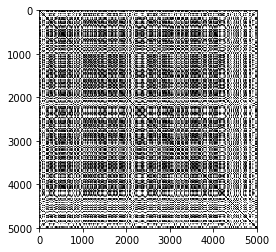

In [89]:
plt.imshow(r, cmap = 'gray')
plt.show()

In [93]:
r_bool = r >= 1
r_bool = r_bool.values
r_bool = r_bool.astype(int)
r_bool

array([[0, 1, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 1, 0]])

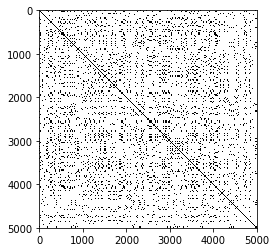

In [96]:
plt.imshow(r_bool, cmap = 'gray')
plt.show()